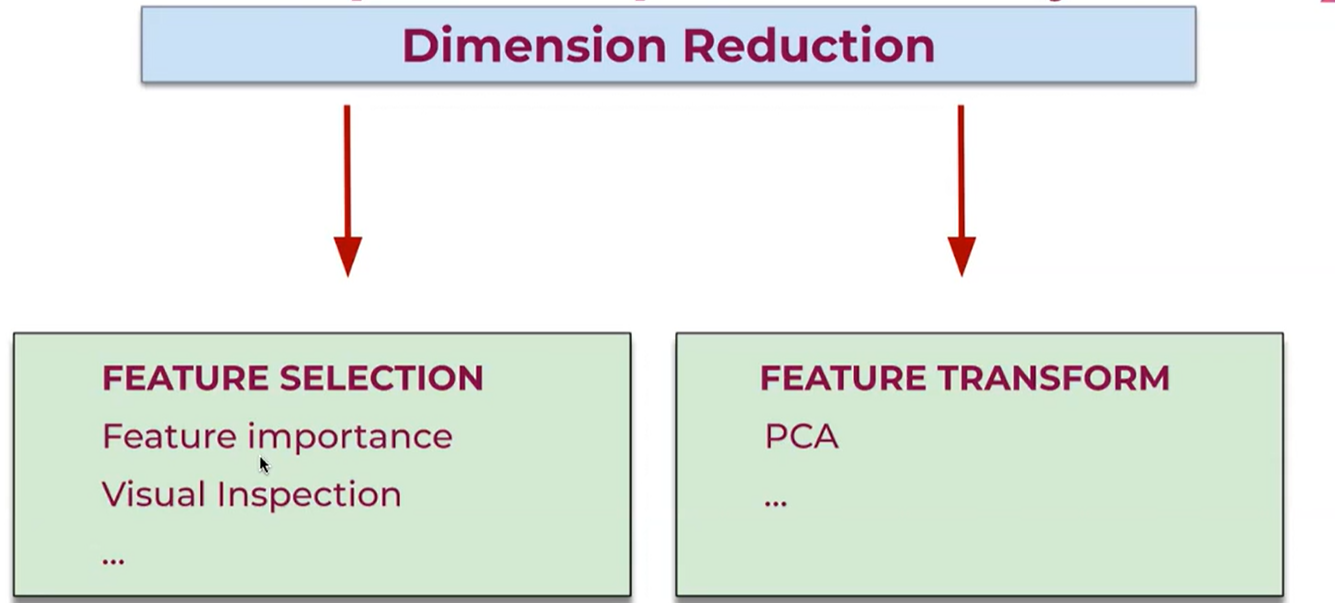

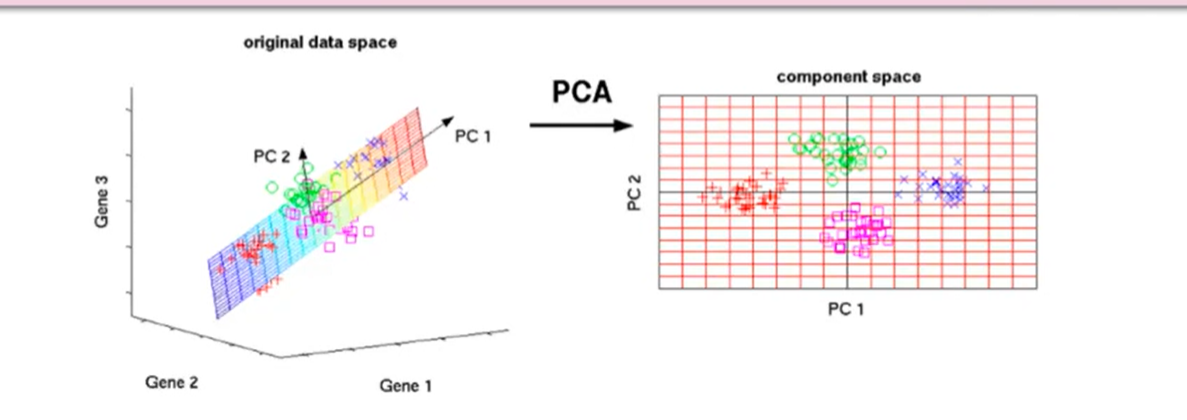

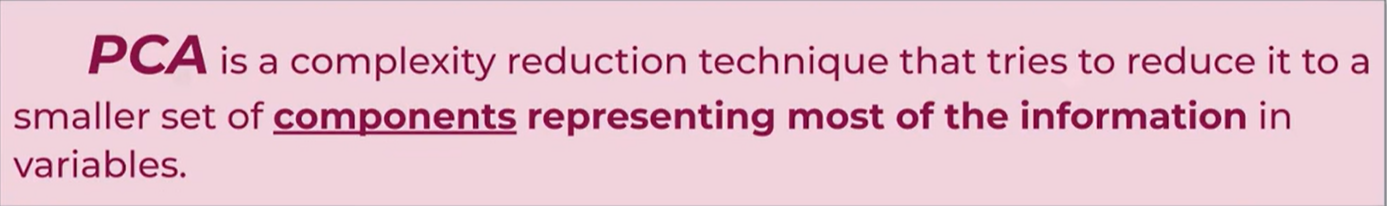

#### Temel bileşen analizi, onu değişkenlerdeki bilgilerin çoğunu temsil eden daha küçük bir bileşen kümesine indirgemeye çalışan bir karmaşıklık azaltma tekniğidir.

In [6]:
# libraries for EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px


#Enabling the offline mode for interactive plotting locally
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
import plotly.io as pio
pio.renderers.default = "notebook"

#To display the plots
# %matplotlib inline

# sklearn library for machine learning algorithms, data preprocessing, and evaluation
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, log_loss, recall_score, accuracy_score, precision_score, f1_score, plot_confusion_matrix, roc_auc_score
from sklearn.metrics import make_scorer, average_precision_score

# yellowbrick library for visualizing the model performance
from yellowbrick.classifier import ConfusionMatrix

from sklearn.pipeline import Pipeline

# # to get rid of the warnings
# import warnings
# warnings.filterwarnings("ignore")
# warnings.warn("this will not show")

# plt.rcParams["figure.figsize"] = (10,6)
# sns.set_style("whitegrid", {'axes.grid' : False})

# To display maximum columns
pd.set_option('display.max_columns', None)

# To display maximum rows
pd.set_option('display.max_rows', 200)

pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [2]:
df = pd.read_csv("creditcard.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0000,-1.3598,-0.0728,2.5363,1.3782,-0.3383,0.4624,0.2396,0.0987,0.3638,0.0908,-0.5516,-0.6178,-0.9914,-0.3112,1.4682,-0.4704,0.2080,0.0258,0.4040,0.2514,-0.0183,0.2778,-0.1105,0.0669,0.1285,-0.1891,0.1336,-0.0211,149.6200,0
1,0.0000,1.1919,0.2662,0.1665,0.4482,0.0600,-0.0824,-0.0788,0.0851,-0.2554,-0.1670,1.6127,1.0652,0.4891,-0.1438,0.6356,0.4639,-0.1148,-0.1834,-0.1458,-0.0691,-0.2258,-0.6387,0.1013,-0.3398,0.1672,0.1259,-0.0090,0.0147,2.6900,0
2,1.0000,-1.3584,-1.3402,1.7732,0.3798,-0.5032,1.8005,0.7915,0.2477,-1.5147,0.2076,0.6245,0.0661,0.7173,-0.1659,2.3459,-2.8901,1.1100,-0.1214,-2.2619,0.5250,0.2480,0.7717,0.9094,-0.6893,-0.3276,-0.1391,-0.0554,-0.0598,378.6600,0
3,1.0000,-0.9663,-0.1852,1.7930,-0.8633,-0.0103,1.2472,0.2376,0.3774,-1.3870,-0.0550,-0.2265,0.1782,0.5078,-0.2879,-0.6314,-1.0596,-0.6841,1.9658,-1.2326,-0.2080,-0.1083,0.0053,-0.1903,-1.1756,0.6474,-0.2219,0.0627,0.0615,123.5000,0
4,2.0000,-1.1582,0.8777,1.5487,0.4030,-0.4072,0.0959,0.5929,-0.2705,0.8177,0.7531,-0.8228,0.5382,1.3459,-1.1197,0.1751,-0.4514,-0.2370,-0.0382,0.8035,0.4085,-0.0094,0.7983,-0.1375,0.1413,-0.2060,0.5023,0.2194,0.2152,69.9900,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0000,-11.8811,10.0718,-9.8348,-2.0667,-5.3645,-2.6068,-4.9182,7.3053,1.9144,4.3562,-1.5931,2.7119,-0.6893,4.6269,-0.9245,1.1076,1.9917,0.5106,-0.6829,1.4758,0.2135,0.1119,1.0145,-0.5093,1.4368,0.2500,0.9437,0.8237,0.7700,0
284803,172787.0000,-0.7328,-0.0551,2.0350,-0.7386,0.8682,1.0584,0.0243,0.2949,0.5848,-0.9759,-0.1502,0.9158,1.2148,-0.6751,1.1649,-0.7118,-0.0257,-1.2212,-1.5456,0.0596,0.2142,0.9244,0.0125,-1.0162,-0.6066,-0.3953,0.0685,-0.0535,24.7900,0
284804,172788.0000,1.9196,-0.3013,-3.2496,-0.5578,2.6305,3.0313,-0.2968,0.7084,0.4325,-0.4848,0.4116,0.0631,-0.1837,-0.5106,1.3293,0.1407,0.3135,0.3957,-0.5773,0.0014,0.2320,0.5782,-0.0375,0.6401,0.2657,-0.0874,0.0045,-0.0266,67.8800,0
284805,172788.0000,-0.2404,0.5305,0.7025,0.6898,-0.3780,0.6237,-0.6862,0.6791,0.3921,-0.3991,-1.9338,-0.9629,-1.0421,0.4496,1.9626,-0.6086,0.5099,1.1140,2.8978,0.1274,0.2652,0.8000,-0.1633,0.1232,-0.5692,0.5467,0.1088,0.1045,10.0000,0


In [5]:
comp = df.drop(["Time","Class","Amount"],axis=1)
comp

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,-1.3598,-0.0728,2.5363,1.3782,-0.3383,0.4624,0.2396,0.0987,0.3638,0.0908,-0.5516,-0.6178,-0.9914,-0.3112,1.4682,-0.4704,0.2080,0.0258,0.4040,0.2514,-0.0183,0.2778,-0.1105,0.0669,0.1285,-0.1891,0.1336,-0.0211
1,1.1919,0.2662,0.1665,0.4482,0.0600,-0.0824,-0.0788,0.0851,-0.2554,-0.1670,1.6127,1.0652,0.4891,-0.1438,0.6356,0.4639,-0.1148,-0.1834,-0.1458,-0.0691,-0.2258,-0.6387,0.1013,-0.3398,0.1672,0.1259,-0.0090,0.0147
2,-1.3584,-1.3402,1.7732,0.3798,-0.5032,1.8005,0.7915,0.2477,-1.5147,0.2076,0.6245,0.0661,0.7173,-0.1659,2.3459,-2.8901,1.1100,-0.1214,-2.2619,0.5250,0.2480,0.7717,0.9094,-0.6893,-0.3276,-0.1391,-0.0554,-0.0598
3,-0.9663,-0.1852,1.7930,-0.8633,-0.0103,1.2472,0.2376,0.3774,-1.3870,-0.0550,-0.2265,0.1782,0.5078,-0.2879,-0.6314,-1.0596,-0.6841,1.9658,-1.2326,-0.2080,-0.1083,0.0053,-0.1903,-1.1756,0.6474,-0.2219,0.0627,0.0615
4,-1.1582,0.8777,1.5487,0.4030,-0.4072,0.0959,0.5929,-0.2705,0.8177,0.7531,-0.8228,0.5382,1.3459,-1.1197,0.1751,-0.4514,-0.2370,-0.0382,0.8035,0.4085,-0.0094,0.7983,-0.1375,0.1413,-0.2060,0.5023,0.2194,0.2152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.8811,10.0718,-9.8348,-2.0667,-5.3645,-2.6068,-4.9182,7.3053,1.9144,4.3562,-1.5931,2.7119,-0.6893,4.6269,-0.9245,1.1076,1.9917,0.5106,-0.6829,1.4758,0.2135,0.1119,1.0145,-0.5093,1.4368,0.2500,0.9437,0.8237
284803,-0.7328,-0.0551,2.0350,-0.7386,0.8682,1.0584,0.0243,0.2949,0.5848,-0.9759,-0.1502,0.9158,1.2148,-0.6751,1.1649,-0.7118,-0.0257,-1.2212,-1.5456,0.0596,0.2142,0.9244,0.0125,-1.0162,-0.6066,-0.3953,0.0685,-0.0535
284804,1.9196,-0.3013,-3.2496,-0.5578,2.6305,3.0313,-0.2968,0.7084,0.4325,-0.4848,0.4116,0.0631,-0.1837,-0.5106,1.3293,0.1407,0.3135,0.3957,-0.5773,0.0014,0.2320,0.5782,-0.0375,0.6401,0.2657,-0.0874,0.0045,-0.0266
284805,-0.2404,0.5305,0.7025,0.6898,-0.3780,0.6237,-0.6862,0.6791,0.3921,-0.3991,-1.9338,-0.9629,-1.0421,0.4496,1.9626,-0.6086,0.5099,1.1140,2.8978,0.1274,0.2652,0.8000,-0.1633,0.1232,-0.5692,0.5467,0.1088,0.1045


## BURADAKİ V1-V'LER:  ORJİNAL DATAYA PCA UYGULANARAK TRANSFORM YAPILMIŞTIR.

## Binary Classification Problem elimizdeki


Veriler, Avrupalı kart sahipleri tarafından Eylül 2013'te iki gün boyunca gerçekleşen kredi kartı işlemlerini temsil etmektedir.

Veri seti,Université Libre de Bruxellesdeki Makine Öğrenimi Grubuna ve Andrea Dal Pozzolo ve ark.Kart sahiplerinin tüm ayrıntıları, bir temel bileşen analizi (PCA) dönüşümü aracılığıyla anonimleştirildi.Ek olarak, satın alma tutarı (muhtemelen Euro cinsinden) ile birlikte işlemler arasındaki süre saniye cinsinden sağlanır.

Spesifik olarak, toplam 284.807 işlemden 492'si sahte kredi kartı işlemi vardır ve bu da tüm işlemlerin yaklaşık %0.172'sine tekabül etmektedir.Pozitif sınıfın (dolandırıcılıkların) tüm işlemlerin %0,172'sini oluşturduğu veri kümesi oldukça dengesizdir…

Buradaki zorluk, kredi kartı şirketlerinin müşterilerinin satın almadıkları ürünler için ücret ödememesi için sahte kredi kartı işlemlerini( fraudulent credit card transactions ) tespit etmektir.

## bu problemin zorlukları nelerdir ?


--Muazzam Veriler her gün işlenir ve model oluşturma, dolandırıcılığa zamanında yanıt verecek kadar hızlı olmalıdır.


--Dengesiz Veriler, yani işlemlerin çoğu (%99,8) hileli değildir, bu da hileli olanları tespit etmeyi gerçekten zorlaştırır

--Veriler çoğunlukla özel olduğundan veri kullanılabilirliği.


-- Yanlış Sınıflandırılmış Veriler, her dolandırıcılık işlemi yakalanmadığı ve rapor edilmediği için başka bir önemli sorun olabilir.


-- Dolandırıcılar tarafından modele karşı kullanılan uyarlanabilir teknikler.

### roc değil de precision-recall'u kullanacağız (çok dengesiz)eğrinin altındaki alan, modelin performansı olarak rapor edilir.

## TARGET CLASS'IMIZIN 1 OLMASINA DİKKAT EDELİM ÇÜNKÜ PRECİSİON-RECALL EĞRİSİ 1 CLASS'INA ODAKLANARAK ÇİZİLİR.

Sınıf dengesizliği oranı göz önüne alındığında, precision-recal Eğrisinin Altındaki Alanı (AUPRC) kullanarak doğruluğu ölçmenizi öneririz.

PCA dönüştürülmüş özelliklerin pozitif ve negatif olduğunu ve çok sayıda float içerdiğini görebiliriz.

TIME sütununun yararlı olması muhtemel değildir ve muhtemelen kaldırılabilir.

PCA değişkenleri ile dolar miktarı arasındaki ölçek farkı, girdi değişkenlerinin ölçeğine duyarlı olan algoritmalar için data scaling kullanılması gerektiğini göstermektedir.

In [ ]:
df.shape

In [ ]:
df.isnull().sum()

In [ ]:
df['Class'].value_counts()

0 --> Normal Transaction

1 --> fraudulent transaction

In [ ]:
df.sample(8)

## fraudların miktarlarını gözden geçirelim..

In [ ]:
# separating the data for analysis
legit = df[df.Class == 0]
fraud = df[df.Class == 1]

In [ ]:
fraud.shape

## sadece fraudlara bakarak feature seçebilir miyiz ? 

In [ ]:
legit["Amount"].describe()

In [ ]:
fraud["Amount"].describe()

## amount = 0 olan bir işlem nasıl fraud olabilir ? veri setindeki maximum legitmiş !!!

In [ ]:
fraud[fraud["Amount"]==0]

In [ ]:
df.groupby('Class').mean()

In [ ]:
df.describe()

Yukarıdaki istatistikleri incelemek, V1-V28 özniteliklerinin sıfır merkezli olduğunu ortaya çıkarır, ancak diğer iki giriş özniteliği Zaman ve Miktar için durum böyle değildir.

## normal işlemlerdeki v'ler 0.001

## v'leri - olan ve 1'i geçenler : v(1 3 5 6 7 9 10 12 14 16 17 18)

## v'leri +  olan ve 1'i geçenler : v(2 4 11 )

In [ ]:
fraud[fraud["Amount"]==0].groupby('Class').mean()

## 5 ve 18 'de gözümüze çarptı.

### Under-Sampling

Normal işlemlerin ve Sahte İşlemlerin benzer dağılımını içeren örnek bir veri kümesi oluşturun

In [ ]:
legit.sample(492)

In [ ]:
legit_sample = legit.sample(492)

In [ ]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [ ]:
new_dataset

In [ ]:
new_dataset['Class'].value_counts()

In [ ]:
new_dataset.groupby('Class').mean()

In [ ]:
new_dataset.sample(10)

In [ ]:
X = new_dataset.drop(columns='Class', axis=1)
y = new_dataset['Class']

In [ ]:
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2)

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train, y_train)

In [ ]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    print("TEST REPORT")
    print(classification_report(y_test, y_pred_test))
    plot_confusion_matrix(model, X_test, y_test);

    print("\n"*3, "-*"*30)
    print("TRAIN REPORT")
    print(classification_report(y_train, y_pred_train))
    plot_confusion_matrix(model, X_train, y_train)
    plt.show()

In [ ]:
eval_metric(model, X_train, y_train, X_test, y_test)

In [ ]:
model =  LogisticRegression()
scores = cross_validate(model, X_train, y_train, scoring = "accuracy", cv = 10,return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

In [ ]:
df_scores.mean()[2:]

### ayrı birisi

In [ ]:
import collections

In [ ]:
target = df.values[:,-1]
counter = collections.Counter(target)
for k,v in counter.items():
    per = v / len(target) * 100
    print('Class=%d, Count=%d, Percentage=%.3f%%' % (k, v, per))

Her biri için bir histogram oluşturarak girdi değişkenlerinin dağılımına da bakabiliriz.Çok sayıda değişken nedeniyle, çizimler darmadağın görünebilir.

In [ ]:
# drop the target variable
df2 = df.drop("Class", axis=1)
# create a histogram plot of each numeric variable
ax = df2.hist(bins=100)
# disable axis labels to avoid the clutter
for axis in ax.flatten():
    axis.set_xticklabels([])
    axis.set_yticklabels([])
# show the plot
plt.show()

### PCA bileşenlerinin çoğunun dağılımının Gauss olduğunu ve birçoğunun sıfır etrafında ortalanabileceğini görebiliriz, bu da değişkenlerin PCA dönüşümünün bir parçası olarak standartlaştırıldığını düşündürür.

Miktar değişkeni ilginç olabilir ve histogramda görünmez.Bu, miktar değerlerinin dağılımının çarpık olabileceğini düşündürmektedir. İşlem boyutları hakkında daha iyi bir fikir edinmek için bu değişkenin 5 haneli bir özetini oluşturabiliriz.

In [ ]:
df["Amount"].describe()

çoğu miktarın küçük olduğunu görebiliriz, ortalama yaklaşık 88 ve gözlemlerin orta yüzde 50'si 5 ile 77 arasındadır.
En büyük değer yaklaşık 25.691'dir ve bu da dağılımı yukarı çeker ve aykırı değer olabilir (örneğin, birisi kredi kartıyla araba satın almış)  BURAYA BİR BOX-PLOT ATILABİLİR.

        We will evaluate candidate models using repeated stratified k-fold cross-validation.
        Aday modelleri tekrarlanan tabakalı k-kat çapraz doğrulama kullanarak değerlendireceğiz.

In [ ]:
X = df.drop("Class",axis=1)
y = df.Class

In [ ]:
from sklearn.metrics import precision_recall_curve

In [ ]:
# calculate precision-recall area under curve
def pr_auc(y_true, probas_pred):
# calculate precision-recall curve
    p, r, _ = precision_recall_curve(y_true, probas_pred)
# calculate area under curve
    return auc(r, p)

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate,RepeatedStratifiedKFold,cross_val_score

In [ ]:
# evaluate a model
def evaluate_model(X, y, model):
    # define evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # define the model evaluation the metric
    metric = make_scorer(pr_auc, needs_proba=True)
    # evaluate model
    scores = cross_val_score(model, X, y, scoring=metric, cv=cv, n_jobs=-1)
    return scores

In [ ]:
from numpy import mean
from numpy import std

In [ ]:
model = DecisionTreeClassifier()

In [ ]:
# evaluate the model
scores = evaluate_model(X, y, model)
# summarize performance
print('Mean PR AUC: %.3f (%.3f)' % (mean(scores), std(scores)))

        Decision Tree (CART)
        k-Nearest Neighbors (KNN)
        Random Forest (RF)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier

#### KNN algoritmasına girdi olarak sağlamadan önce girdi değişkenlerini standartlaştıracağız.

### Her modeli sırayla tanımlayacağız ve sırayla değerlendirebilmemiz için bir listeye ekleyeceğiz.
### Aşağıdaki get_models() işlevi, değerlendirme için modellerin listesini ve sonuçları daha sonra çizmek için model kısa adlarının bir listesini tanımlar.

In [ ]:
def get_models():
    models, names = list(), list()
    # CART
    models.append(DecisionTreeClassifier())
    names.append('CART')
    
    
    # KNN
    steps = [('s',StandardScaler()),('m',KNeighborsClassifier())]
    models.append(Pipeline(steps=steps))
    names.append('KNN')
    
     # RF
    models.append(RandomForestClassifier(n_estimators=100))
    names.append('RF')
   
    return models, names

In [ ]:
# # define models
# models, names = get_models()
# results = list()
# # evaluate each model
# for i in range(len(models)):
#     # evaluate the model and store results
#     scores = evaluate_model(X, y, models[i])
#     results.append(scores)
#     # summarize performance
#     print('>%s %.3f (%.3f)' % (names[i], mean(scores), std(scores)))

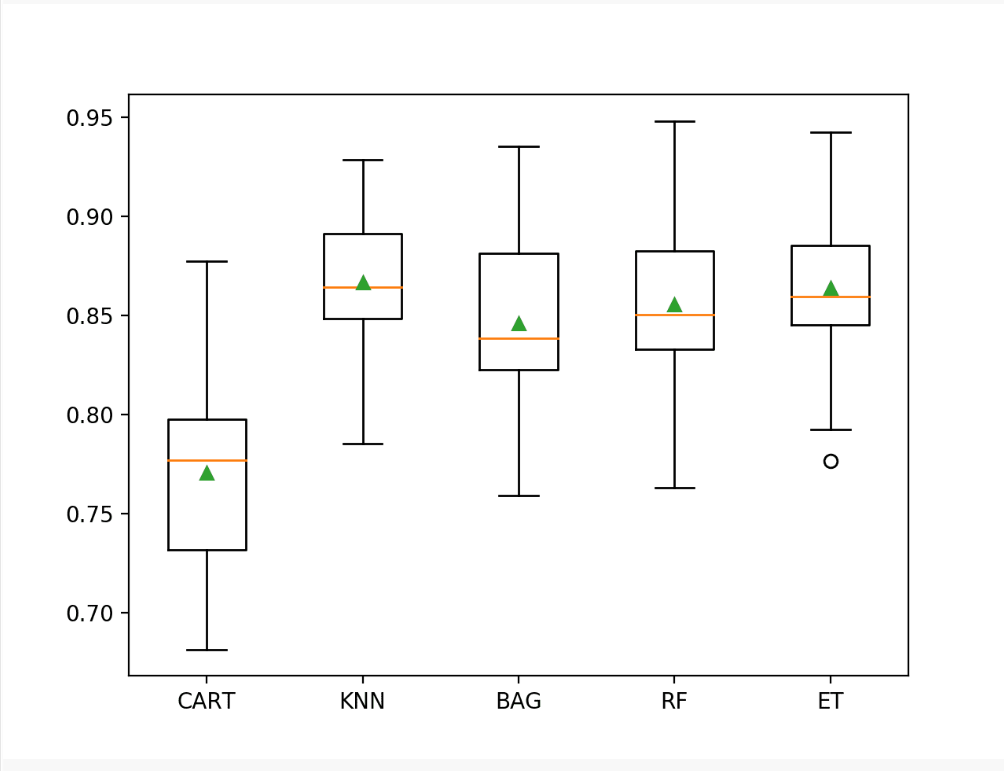

In [ ]:
# plot the results
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

KNN ve karar ağaçları toplulukları için puan dağılımlarının sıkı olduğunu ve ortalamaların medyanlarla çakıştığını görebiliriz, bu da dağılımların simetrik olabileceğini ve muhtemelen Gauss olduğunu ve puanların muhtemelen oldukça kararlı olduğunu düşündürür.

## uygun bir threshold seçme işlemi imbalanced datalarda nasıl yapılır ???

## class_weight meselesi önemli.

## ayrı

In [ ]:
df

In [ ]:
fraud = df[df['Class'] == 1]
valid = df[df['Class'] == 0]

Tüm işlemlerden sadece %0,17 hileli işlem çıktı.

In [ ]:
fraud.Amount.describe()

In [ ]:
valid.Amount.describe()

### Buradan da açıkça anladığımız gibi, hileli olanlar için ortalama Money işlemi daha fazladır.

## Korelasyon matrisi bize özelliklerin birbirleriyle nasıl ilişkili olduğuna dair grafiksel bir fikir verir ve tahmin için en uygun özelliklerin neler olduğunu tahmin etmemize yardımcı olabilir.

In [ ]:
corrmat = df.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

### HeatMap'te, özelliklerin çoğunun diğer özelliklerle ilişkili olmadığını açıkça görebiliriz,



### ancak birbirleriyle pozitif veya negatif korelasyona sahip bazı özellikler vardır.

## Örneğin, V2 ve V5, Amount adı verilen feature ile yüksek oranda negatif ilişkilidir.

## Ayrıca V20 ve Amount ile bir miktar korelasyon görüyoruz.

In [ ]:
X = df.drop(['Class'], axis = 1)
y =df["Class"]

In [ ]:
print(X.shape)
print(y.shape)

In [ ]:
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
rfc = RandomForestClassifier(max_depth=6,random_state=42)

In [ ]:
rfc.fit(X_train,y_train)

In [ ]:
eval_metric(rfc, X_train, y_train, X_test, y_test)

## ayrı

Kredi kartı şirketlerinin, müşterilerin satın almadıkları ürünlere ücret ödememeleri için sahte kredi kartı işlemlerini fark edebilmeleri önemlidir.

## kesinlikle PCA inanmıyorsan korelasyon matrisine bak. PCA UYGULANMAYAN SÜTUNLAR ZATEN TIME VE AMOUNT , CLASS

### 'Amount' özelliği işlem Tutarıdır, bu özellik örneğin cost-senstive learning için kullanılabilir.

In [ ]:
df

In [ ]:
df["Time"].nunique()

In [ ]:
import random
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold 
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier 
import xgboost
# import DMatrix
from sklearn import metrics
from datetime import datetime

In [ ]:
value_counts = df["Class"].value_counts()
value_counts.plot(kind="bar", title="Class distribution of the target variable")

In [ ]:
df[["Amount", "Time"]].describe()

In [ ]:
ax = df.drop("Class", axis=1).hist(figsize=(10,12),bins=100)
# We hide the axes' labels to make the plot neater and more compact
for axis in ax.flatten():
    axis.set_xticklabels([])
    axis.set_yticklabels([])

### Ana bileşenler hakkında yapabileceğimiz pek bir şey yok, ancak amount ve time  özellikleri daha ayrıntılı bir incelemeyi hak ediyor gibi görünüyor.

In [ ]:
df.info()

In [ ]:
df["Time"]                 # seconds          -----------------------> timestamp

### Bunu yerel tarihe dönüştürebilir ve işlem saatinin bir işlemin hileli olma olasılığı ile ilişkili olup olmadığını belirleme girişiminde bulunarak saatleri çıkarabiliriz.

In [ ]:
datetime.fromtimestamp

In [ ]:
df["Hour"] = df["Time"].apply(datetime.fromtimestamp).dt.hour

In [ ]:
df["Hour"].unique()

In [ ]:
len(df["Hour"].unique())

### fromtimestamp() işlevi, belirtilen bir zaman damgasına karşılık gelen tarihi döndürmek için kullanılır.

In [ ]:
df["Time"].apply(datetime.fromtimestamp)

## bu bozuk bir kod olabilir DİKKAT

### fromtimestamp() işlevi, belirtilen bir timestamp'e karşılık gelen tarihi döndürmek için kullanılır.

In [ ]:
df["Hour"] = df["Time"].apply(datetime.fromtimestamp).dt.hour
fig, ax = plt.subplots(2, figsize=(10,7))
for a in ax:
    a.set_xticks(range(24))
df.loc[df["Class"] == 0]["Hour"].hist(bins=np.arange(24)-0.5, ax=ax[0], grid=False)
df.loc[df["Class"] == 1]["Hour"].hist(bins=np.arange(24)-0.5, ax=ax[1], grid=False)
ax[0].title.set_text("Legitimate Transactions")
ax[1].title.set_text("Fraudulent Transactions")
plt.subplots_adjust(hspace=0.3)

### Meşru işlemlerin gece saatlerinde düştüğü ve iş gününün başlamasıyla birlikte oranlarının arttığı görülüyor.

### Buna karşılık, saat 2 civarında - öğlen -olağandışı görünen bir dolandırıcılık zirvesi var.


###

In [ ]:
def compare_leg_fraud(attribute):
    leg_trS = df.loc[df["Class"] == 0][attribute].rename("Legitimate").describe()
    frd_trS = df.loc[df["Class"] == 1][attribute].rename("Fraudulent").describe()
    tr_hourDF = leg_trS.to_frame().join(frd_trS.to_frame())
    return tr_hourDFcompare_leg_fraud("Hour")

In [ ]:
compare_leg_fraud("Amount")

### Şimdi dikkatimizi işlem tutarına kaydırıyoruz. Hileli ve yasal işlemlerin dağılımını histogramlar aracılığıyla görselleştirelim.

In [ ]:
fig, ax = plt.subplots(2, figsize=(9,7))
df.loc[df["Class"] == 0]["Amount"].hist(bins=30, ax=ax[0])
df.loc[df["Class"] == 1]["Amount"].hist(bins=30, ax=ax[1])
ax[0].title.set_text("Legitimate Transactions")
ax[1].title.set_text("Fraudulent Transactions")
plt.subplots_adjust(hspace=0.3)

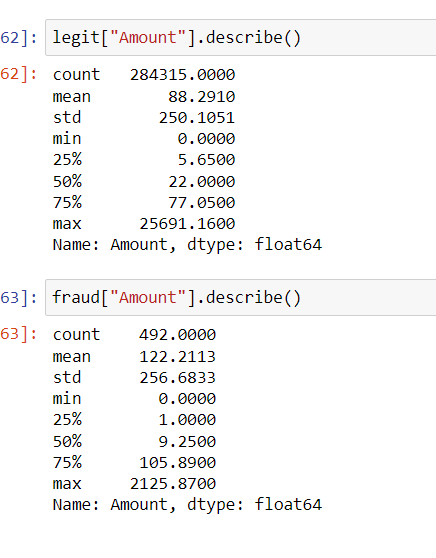








### Toplam tutar mutlak olarak önemli ölçüde daha düşük olmasına rağmen, hileli işlemler için ortalama işlem tutarı daha yüksek gibi görünüyor

In [ ]:
fraud["Amount"].sum()

In [ ]:
legit["Amount"].sum()

### Ayrıca en sık yapılan 5 meşru işleme de bakabiliriz

In [ ]:
(df.loc[df["Class"] == 0]["Amount"].value_counts().head())

In [ ]:
(df.loc[df["Class"] == 0]["Amount"].value_counts(normalize=True)*100).head()

### versus ilk 5 dolandırıcılık işlemine

In [ ]:
(df.loc[df["Class"] == 1]["Amount"].value_counts(normalize=True)*100).head()

### Tüm hileli işlemlerin yaklaşık %23'ünün 1.0'a ulaştığını ve meşru kümedeki aynı işlem tutarının yüzdesinin %5'e yakın olduğunu görüyoruz

### Ayrıca, muhtemelen kart sahibi ayrıntılarını doğrulama işlemlerinin sonucu olan çok sayıda 0 değerli işlem görüyoruz.

## Feature Engineering 

## Herhangi bir özellik mühendisliği denemeden önce yapacağımız ilk şey, bir holdout set oluşturmaktır.

## Bu, test setimize herhangi bir bilgi sızmasını önlemek içindir.

In [ ]:
traindf, testdf = train_test_split(df, test_size=0.2, random_state=1234, stratify=df[["Class"]])
traindf["Amount"] = traindf["Amount"].subtract(traindf["Amount"].mean())
traindf["Hour"] = traindf["Hour"].subtract(traindf["Hour"].mean())

In [ ]:
testDF_norm = testdf.copy()

In [ ]:
testDF_norm["Amount"] = testdf["Amount"].subtract(testdf["Amount"].mean())
testDF_norm["Hour"] = testdf["Hour"].subtract(testdf["Hour"].mean())

In [ ]:
traindf = traindf.copy()
testdf = testDF_norm
tr_value_counts = traindf["Class"].value_counts()
print("Fraudulent transactions are %.2f%% of the training set." % (tr_value_counts[1] * 100 / len(traindf)))
tst_value_counts = testdf["Class"].value_counts()
print("Fraudulent transactions are %.2f%% of the test set." % (tst_value_counts[1] * 100 / len(testdf)))

## Keşif analizi sırasında Tutar sütununun sıfır ortalama merkezli olmadığını fark ettik.

In [ ]:
trainDF_norm = trainDF.copy()
trainDF_norm["Amount"] = trainDF["Amount"].subtract(trainDF["Amount"].mean())
trainDF_norm["Hour"] = trainDF["Hour"].subtract(trainDF["Hour"].mean())
testDF_norm = testDF.copy()
testDF_norm["Amount"] = testDF["Amount"].subtract(testDF["Amount"].mean())
testDF_norm["Hour"] = testDF["Hour"].subtract(testDF["Hour"].mean())
trainDF = trainDF_normtestDF = testDF_norm

In [ ]:
df["Hour"]

In [ ]:
df["Hour"].subtract(df["Hour"].mean())

In [ ]:
df

In [ ]:
X = df.drop(columns='Class', axis=1)
y = df['Class']

In [ ]:
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2)

In [ ]:
X_train_smote, y_train_smote = SMOTE(random_state=1234).fit_resample(X_train, y_train)
smote_value_counts = y_train_smote.value_counts()
print("Fraudulent transactions are %.2f%% of the test set." % (smote_value_counts[0] * 100 / len(y_train_smote)))

### Sınıf dengesizliği çözüldüğüne göre artık gerçek model eğitimine geçebiliriz.

In [ ]:
def xgboost_search(X, y, search_verbose=1):
    params = {
    "gamma":[0.5, 1, 1.5, 2, 5],
    "max_depth":[3,4,5,6],
    "min_child_weight": [100],
    "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0],
    "learning_rate": [0.1, 0.01, 0.001]
    }
    xgb = XGBClassifier(objective="binary:logistic", eval_metric="auc", use_label_encoder=False)

    skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=1234)

    grid_search = GridSearchCV(estimator=xgb, param_grid=params, scoring="roc_auc", n_jobs=1, cv=skf.split(X,y), verbose=search_verbose)

    grid_search.fit(X, y)

    print("Best estimator: ")
    print(grid_search.best_estimator_)
    print("Parameters: ", grid_search.best_params_)
    print("Highest AUC: %.2f" % grid_search.best_score_)

    return grid_search.best_params_

## SMOTE YAPTIĞIMIZ İÇİN ARTIK ROC-AUC'A BAKMALIMIYIZ ?

In [ ]:
#xgboost_search(X_train_smote, y_train_smote)

## ayrı

In [ ]:
df

## What is Credit Card Fraud Detection?


## Kart sahibinin bilgisi dışında yapılan işlemler.

### dolandırıcılar, kartın gizli ayrıntılarını güvenli olmayan web sitelerinden alabilir. eğer + bir kimlilk doğrulama işlemi varsa amount = 0 gözükür.

### Bir dolandırıcı bir kişinin kredi/banka kartını tehlikeye attığında, gizli verileri sızdırılan kişiden, kredi kartını veren işletmelere (genellikle bankalara) ve satın alma ile işlemi sonuçlandıran işyerine kadar sürece dahil olan herkes zarar görür. Bu, hileli işlemlerin başlangıçta tespit edilmesini son derece önemli hale getirir.

## How does Credit Card Fraud work? Kredi Kartı Dolandırıcılığı nasıl çalışır?

## Lost/Stolen cards:(Kayıp/Çalıntı kartlar)


## Kart Suistimali : Müşteri, kredi kartıyla mal ve eşya satın alır ancak bunun için banka tarafından tahsil edilen tutarı geri ödemeye niyeti yoktur.



##   Kimlik Hırsızı: gerçek bir müşterinin bilgilerini çalarak kredi kartı başvurusunda bulunabilirler ve ardından bu bilgileri kötüye kullanabilirler.


## Satıcıyı Kötüye Kullanma : Bazı tüccarlar kara para aklama için yasadışı işlemler (hiç gerçekleşmemiş) gösteriyor.Bu yasa dışı işlemlerin gerçekleştirilmesi için gerçek kredi kartı kullanıcılarının yasal bilgileri çalınarak kartların kopyaları oluşturulmakta ve yasa dışı işlerde kullanılmaktadır.


##


##

##


## CVV doğrulaması, coğrafi konum takibi, IP Adresi doğrulaması, vb. gibi kredi kartı dolandırıcılık tespiti için çok eski zamanlardan beri birçok geleneksel teknik kullanılmıştır.Ancak zamanla, suçlular suç işlemek için daha gelişmiş teknikler kullanıyorlar ve sadece geleneksel yöntemlerle hepsini engellemek mümkün değil.



In [7]:
from sklearn.manifold import TSNE

In [ ]:
%matplotlib.inline
plt.style.use("ggplot")

In [8]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0000,-1.3598,-0.0728,2.5363,1.3782,-0.3383,0.4624,0.2396,0.0987,0.3638,0.0908,-0.5516,-0.6178,-0.9914,-0.3112,1.4682,-0.4704,0.2080,0.0258,0.4040,0.2514,-0.0183,0.2778,-0.1105,0.0669,0.1285,-0.1891,0.1336,-0.0211,149.6200,0
1,0.0000,1.1919,0.2662,0.1665,0.4482,0.0600,-0.0824,-0.0788,0.0851,-0.2554,-0.1670,1.6127,1.0652,0.4891,-0.1438,0.6356,0.4639,-0.1148,-0.1834,-0.1458,-0.0691,-0.2258,-0.6387,0.1013,-0.3398,0.1672,0.1259,-0.0090,0.0147,2.6900,0
2,1.0000,-1.3584,-1.3402,1.7732,0.3798,-0.5032,1.8005,0.7915,0.2477,-1.5147,0.2076,0.6245,0.0661,0.7173,-0.1659,2.3459,-2.8901,1.1100,-0.1214,-2.2619,0.5250,0.2480,0.7717,0.9094,-0.6893,-0.3276,-0.1391,-0.0554,-0.0598,378.6600,0
3,1.0000,-0.9663,-0.1852,1.7930,-0.8633,-0.0103,1.2472,0.2376,0.3774,-1.3870,-0.0550,-0.2265,0.1782,0.5078,-0.2879,-0.6314,-1.0596,-0.6841,1.9658,-1.2326,-0.2080,-0.1083,0.0053,-0.1903,-1.1756,0.6474,-0.2219,0.0627,0.0615,123.5000,0
4,2.0000,-1.1582,0.8777,1.5487,0.4030,-0.4072,0.0959,0.5929,-0.2705,0.8177,0.7531,-0.8228,0.5382,1.3459,-1.1197,0.1751,-0.4514,-0.2370,-0.0382,0.8035,0.4085,-0.0094,0.7983,-0.1375,0.1413,-0.2060,0.5023,0.2194,0.2152,69.9900,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0000,-11.8811,10.0718,-9.8348,-2.0667,-5.3645,-2.6068,-4.9182,7.3053,1.9144,4.3562,-1.5931,2.7119,-0.6893,4.6269,-0.9245,1.1076,1.9917,0.5106,-0.6829,1.4758,0.2135,0.1119,1.0145,-0.5093,1.4368,0.2500,0.9437,0.8237,0.7700,0
284803,172787.0000,-0.7328,-0.0551,2.0350,-0.7386,0.8682,1.0584,0.0243,0.2949,0.5848,-0.9759,-0.1502,0.9158,1.2148,-0.6751,1.1649,-0.7118,-0.0257,-1.2212,-1.5456,0.0596,0.2142,0.9244,0.0125,-1.0162,-0.6066,-0.3953,0.0685,-0.0535,24.7900,0
284804,172788.0000,1.9196,-0.3013,-3.2496,-0.5578,2.6305,3.0313,-0.2968,0.7084,0.4325,-0.4848,0.4116,0.0631,-0.1837,-0.5106,1.3293,0.1407,0.3135,0.3957,-0.5773,0.0014,0.2320,0.5782,-0.0375,0.6401,0.2657,-0.0874,0.0045,-0.0266,67.8800,0
284805,172788.0000,-0.2404,0.5305,0.7025,0.6898,-0.3780,0.6237,-0.6862,0.6791,0.3921,-0.3991,-1.9338,-0.9629,-1.0421,0.4496,1.9626,-0.6086,0.5099,1.1140,2.8978,0.1274,0.2652,0.8000,-0.1633,0.1232,-0.5692,0.5467,0.1088,0.1045,10.0000,0


In [9]:
df["Time"].describe()

count   284807.0000
mean     94813.8596
std      47488.1460
min          0.0000
25%      54201.5000
50%      84692.0000
75%     139320.5000
max     172792.0000
Name: Time, dtype: float64

## İşlemlerin sayısını saatler içinde görselleştirmeye çalışalım.Bunu önce tüm veri seti için yapacağız ve sonra onu dolandırıcı kullanıcılar ve dolandırıcı olmayan kullanıcılar arasında böleceğiz.

In [10]:
df["Time"]

0             0.0000
1             0.0000
2             1.0000
3             1.0000
4             2.0000
             ...    
284802   172786.0000
284803   172787.0000
284804   172788.0000
284805   172788.0000
284806   172792.0000
Name: Time, Length: 284807, dtype: float64

Text(0.5, 1.0, 'Transaction Times')

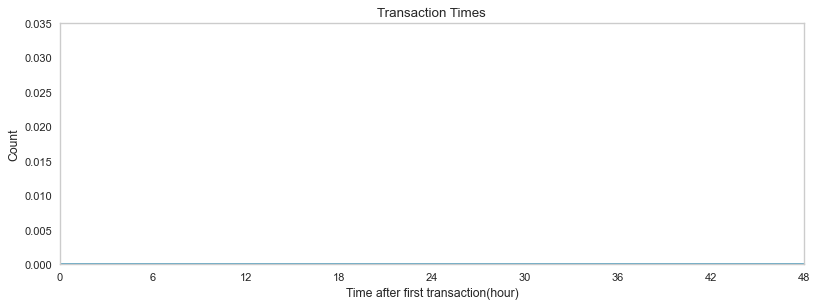

In [13]:
plt.figure(figsize=(12,4),dpi=80)
sns.distplot(df["Time"],bins=48)
plt.xlim([0,48])
plt.xticks(np.arange(0,54,6))
plt.xlabel("Time after first transaction(hour)")            # İlk işlemden sonraki süre(saat)
plt.ylim([0,0.035])                                               
plt.ylabel("Count")
plt.title("Transaction Times")                                # İşlem Süreleri

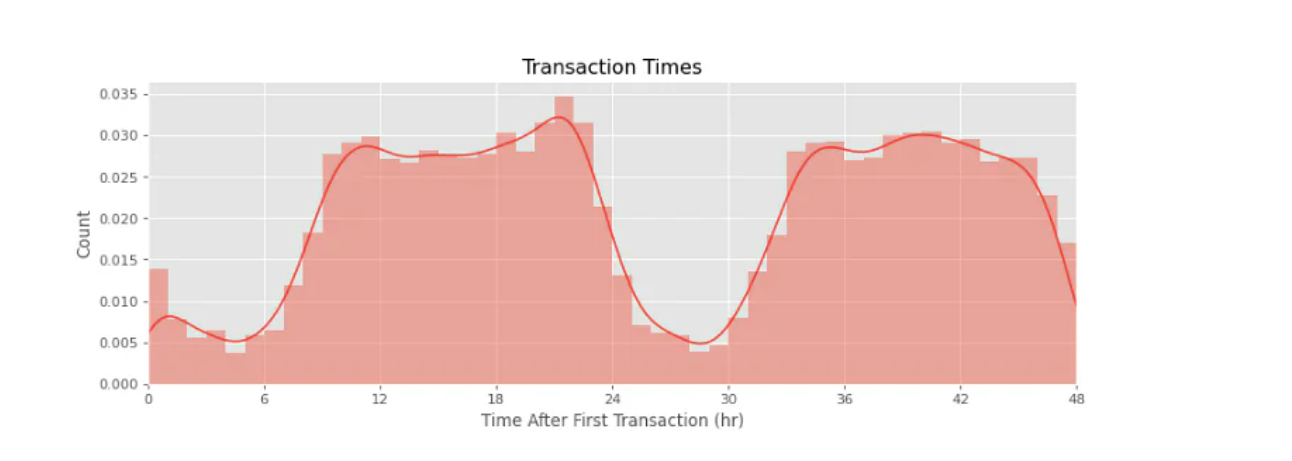  


böyle olması gerekiyordu.

## legit için

Text(0.5, 1.0, 'Transaction Times')

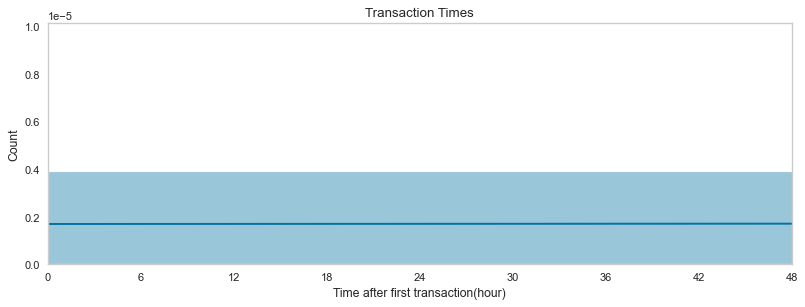

In [15]:
legit = df[df["Class"] == 0]
plt.figure(figsize=(12,4),dpi=80)
sns.distplot(legit["Time"],bins=48)
plt.xlim([0,48])
plt.xticks(np.arange(0,54,6))
plt.xlabel("Time after first transaction(hour)")            # İlk işlemden sonraki süre(saat)
                                            
plt.ylabel("Count")
plt.title("Transaction Times")                                # İşlem Süreleri

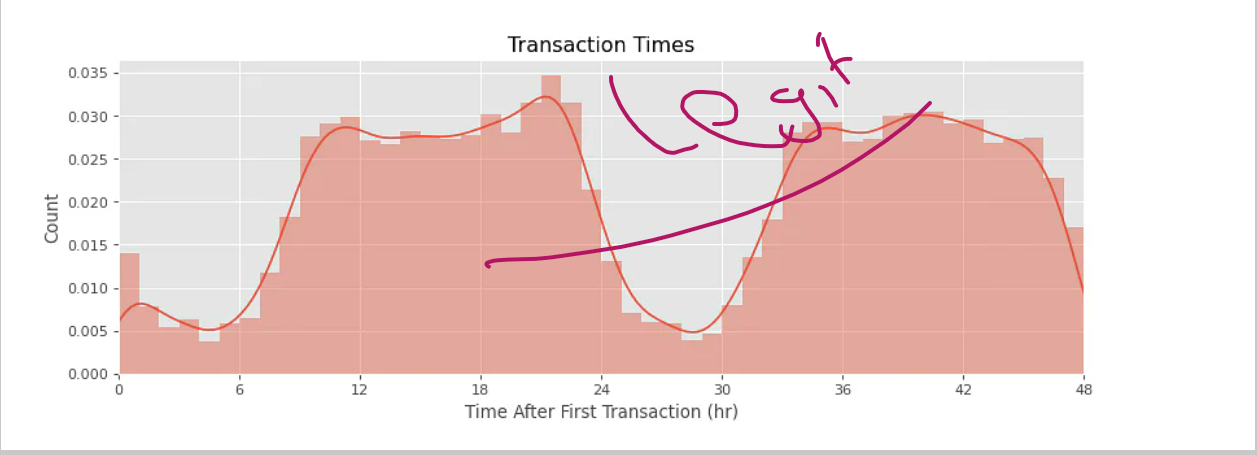

Text(0.5, 1.0, 'Transaction Times')

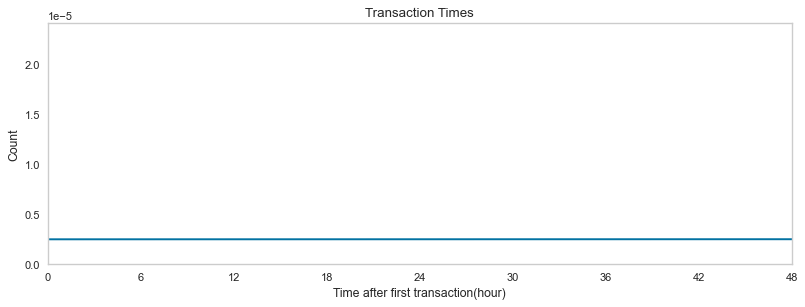

In [16]:
fraud = df[df["Class"] == 1]
plt.figure(figsize=(12,4),dpi=80)
sns.distplot(fraud["Time"],bins=48)
plt.xlim([0,48])
plt.xticks(np.arange(0,54,6))
plt.xlabel("Time after first transaction(hour)")            # İlk işlemden sonraki süre(saat)
                                            
plt.ylabel("Count")
plt.title("Transaction Times")                                # İşlem Süreleri

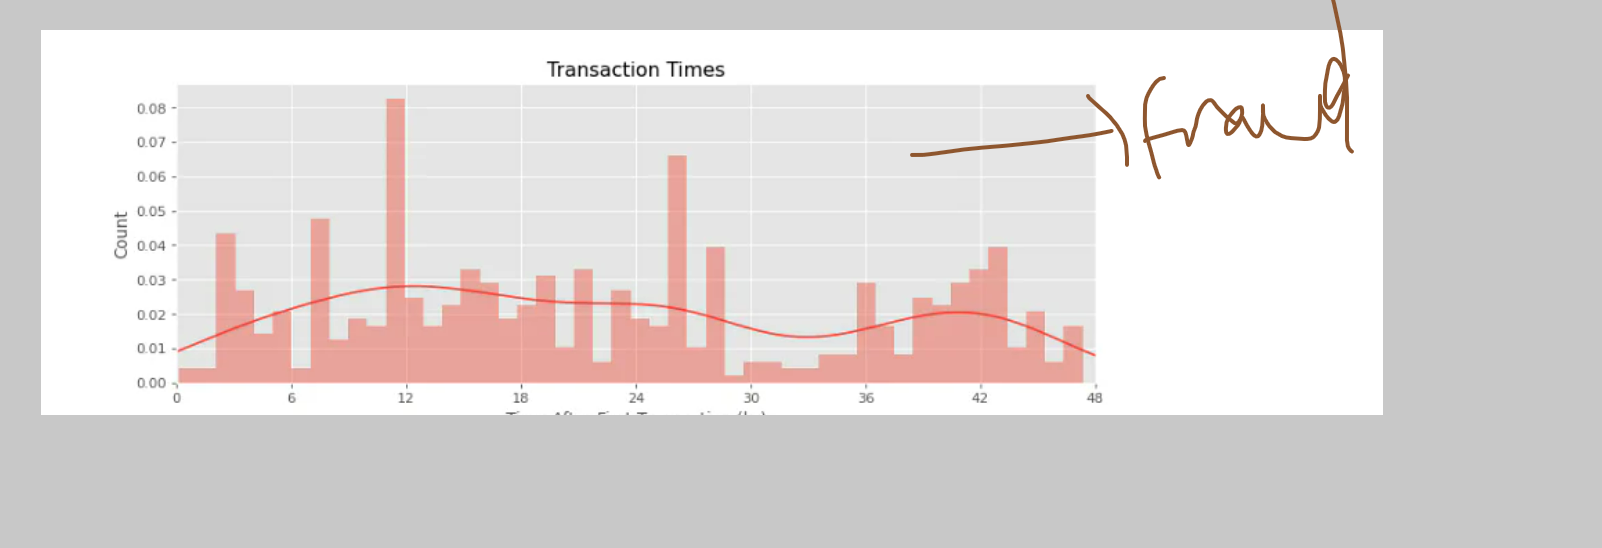

## fraud olmayan işlemlerin sıklığına bakarak ilk işlemin gece mi sabah mı öğlen mi olduğu çıkarımını yapabiliriz bir ihtimal ile BURAYA DİKKAT BUNU BEN KENDİM YORUMLADIM BAKILABİLİR. SAAT ARALIĞI ŞEKLİNDE DE MODELE VERİLEBİLME DURUMUNA BAKILABİLİR.

### Gördüğünüz gibi, gerçek kullanıcılar için yapılan işlem sayısı gece geç saatlerde ve sabahın erken saatlerinde bir darbe alıyor.Ayrıca çoğu insan bu sırada uyuduğu için mantıklıdır.



### Aksine, hileli işlemler için, sayı geç saatlerde keskin artışlar görür ve gündüzleri sayı önemli ölçüde daha azdır

## BUNLAR FARKLI RENKLERDE AYNI GRAFİK ÜZERİNDE ÇİZİLİP BAKILABİLİR.

In [17]:
df["Amount"]

0        149.6200
1          2.6900
2        378.6600
3        123.5000
4         69.9900
           ...   
284802     0.7700
284803    24.7900
284804    67.8800
284805    10.0000
284806   217.0000
Name: Amount, Length: 284807, dtype: float64

## Dağılım grafiğini ve kutu grafiğini çizdikten sonra, özelliğin büyük ölçüde sağa çarpık olduğunu ve çok sayıda ou'ya sahip olduğunu görebiliriz ve Bu, kredi kartı dolandırıcılık tespit modelini yanlış yönlendirebilir -

<AxesSubplot:xlabel='Amount'>

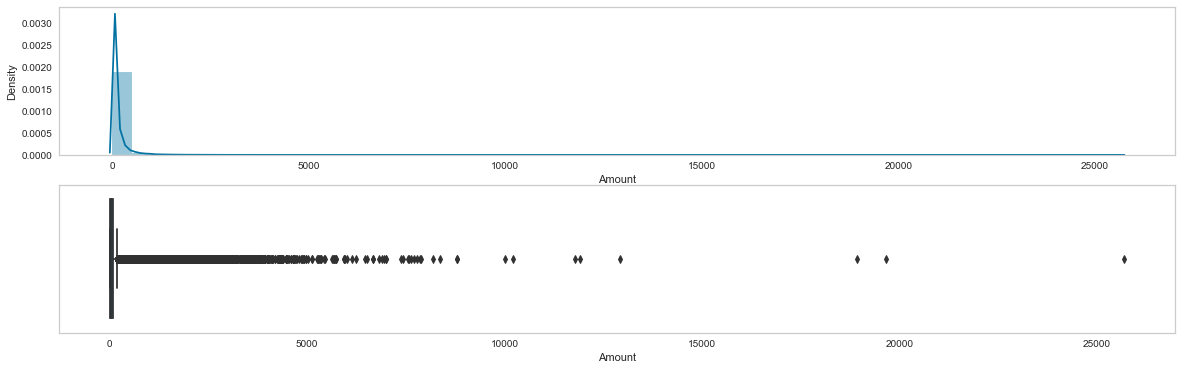

In [18]:
fig , (ax1,ax2)  = plt.subplots(2,1,figsize=(20,6))
sns.distplot(df["Amount"],ax = ax1)
sns.boxplot(df["Amount"],ax = ax2)

## amount özelliği üzerinde IQR analizi yaptığımızda bazı fraud verilerini kaybettiğimizi görebiliyoruz : *******************

In [19]:
from scipy.stats import iqr

In [21]:
iqr(df["Amount"])

71.565

In [23]:
upper_limit = df["Amount"].quantile(0.75)  + (1.5 * iqr(df["Amount"]))
upper_limit

184.5125

## 1.5 Allah'ın emri değildi unutmayalım.

In [24]:
df[df["Amount"] > upper_limit]["Class"].value_counts()

0    31813
1       91
Name: Class, dtype: int64

## fraud sayım zaten az buna dikkat o yüzden kaldırmamalııyım. sadece class = 0 'ları kaldırsak ne olur buna da bir göz atalım.

In [26]:
df[df["Class"] == 1]["Amount"].describe()

count    492.0000
mean     122.2113
std      256.6833
min        0.0000
25%        1.0000
50%        9.2500
75%      105.8900
max     2125.8700
Name: Amount, dtype: float64

In [29]:
df2 = df[df["Amount"] <= 8000]                   # bu 8000 'i de değiştirebiliriz.
df2["Class"].value_counts()

0    284303
1       492
Name: Class, dtype: int64

In [28]:
df["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [30]:
df3 = df[df["Amount"] <= 2126]                   # bu 8000 'i de değiştirebiliriz.
df3["Class"].value_counts()

0    283713
1       492
Name: Class, dtype: int64

## df2'ye göre

Text(0.5, 1.0, 'NORMAL')

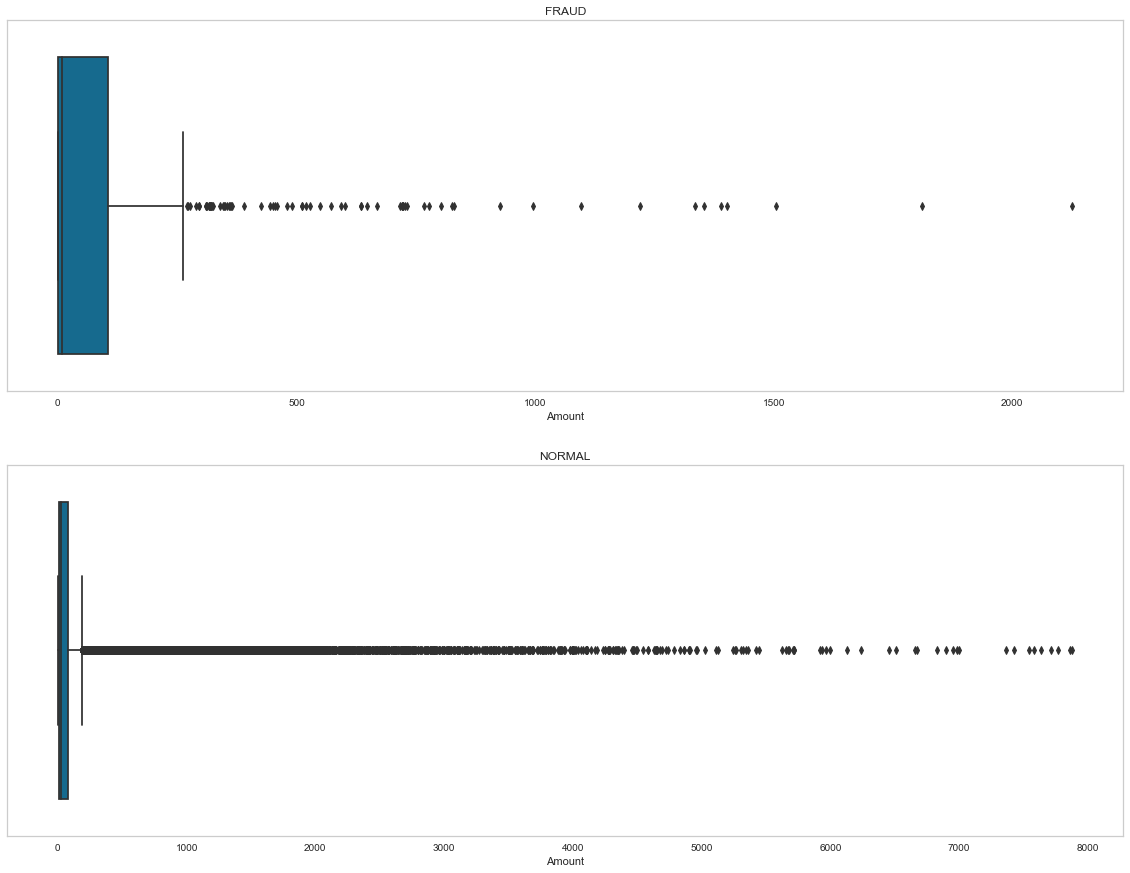

In [32]:
fig , (ax1,ax2)  = plt.subplots(2,1,figsize=(20,15))
sns.boxplot(df2[df2["Class"] == 1].Amount,ax = ax1)
ax1.set_title("FRAUD")
sns.boxplot(df2[df2["Class"] == 0].Amount,ax = ax2)

ax2.set_title("NORMAL")

## HEATMAP İLE KORELASYON ANALİZİNE BAKIP ŞUNU DİYEBİLİRİZ : PCA SONUCUNDA ELDE EDİLEN PRİNCİPAL COMPONENTLER BİRBİRİNDEN TAMAMEN BAĞIMZSIDIR VE DOLAYISIYLA KORELASYONLARI YOKTUR.Dolayısıyla korelasyon analizine dayalı herhangi bir özelliği kaldırmamız gerekmiyor.

## ayrı

### Sınıflandırma için kullanılan makine öğrenimi algoritmalarının çoğu, her sınıf için eşit sayıda örnek varsayımı etrafında tasarlandığından, dengesiz sınıflandırmalar, tahmine dayalı modelleme için bir zorluk teşkil eder.

### Dengesiz sınıflandırma, her bir sınıf etiketi için eğitim veri setindeki örnek sayısının dengeli olmadığı bir sınıflandırma tahmine dayalı modelleme problemini ifade eder. stratify = y demek bu demek değildiri güzelce anlatan bir husus.

## A slight imbalance is often not a concern, and the problem can often be treated like a normal classification predictive modeling problem. A severe imbalance of the classes can be challenging to model and may require the use of specialized techniques.

## Hafif bir dengesizlik genellikle bir endişe kaynağı değildir ve sorun genellikle normal bir sınıflandırma öngörücü modelleme sorunu gibi ele alınabilir. Sınıflardaki ciddi bir dengesizliği modellemek zor olabilir ve özel tekniklerin kullanılmasını gerektirebilir.

## Dengesiz bir sınıflandırma problemi ile çalışırken, azınlık sınıfı tipik olarak en çok ilgi çeken sınıftır. Bu, bir modelin azınlık sınıfı için sınıf etiketini veya olasılığını doğru tahmin etme becerisinin çoğunluk sınıfı veya sınıflarından daha önemli olduğu anlamına gelir.

## Çoğunluk sınıfından (veya sınıflarından) örneklerin bolluğu azınlık sınıfını boğabilir.

In [33]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0000,-1.3598,-0.0728,2.5363,1.3782,-0.3383,0.4624,0.2396,0.0987,0.3638,0.0908,-0.5516,-0.6178,-0.9914,-0.3112,1.4682,-0.4704,0.2080,0.0258,0.4040,0.2514,-0.0183,0.2778,-0.1105,0.0669,0.1285,-0.1891,0.1336,-0.0211,149.6200,0
1,0.0000,1.1919,0.2662,0.1665,0.4482,0.0600,-0.0824,-0.0788,0.0851,-0.2554,-0.1670,1.6127,1.0652,0.4891,-0.1438,0.6356,0.4639,-0.1148,-0.1834,-0.1458,-0.0691,-0.2258,-0.6387,0.1013,-0.3398,0.1672,0.1259,-0.0090,0.0147,2.6900,0
2,1.0000,-1.3584,-1.3402,1.7732,0.3798,-0.5032,1.8005,0.7915,0.2477,-1.5147,0.2076,0.6245,0.0661,0.7173,-0.1659,2.3459,-2.8901,1.1100,-0.1214,-2.2619,0.5250,0.2480,0.7717,0.9094,-0.6893,-0.3276,-0.1391,-0.0554,-0.0598,378.6600,0
3,1.0000,-0.9663,-0.1852,1.7930,-0.8633,-0.0103,1.2472,0.2376,0.3774,-1.3870,-0.0550,-0.2265,0.1782,0.5078,-0.2879,-0.6314,-1.0596,-0.6841,1.9658,-1.2326,-0.2080,-0.1083,0.0053,-0.1903,-1.1756,0.6474,-0.2219,0.0627,0.0615,123.5000,0
4,2.0000,-1.1582,0.8777,1.5487,0.4030,-0.4072,0.0959,0.5929,-0.2705,0.8177,0.7531,-0.8228,0.5382,1.3459,-1.1197,0.1751,-0.4514,-0.2370,-0.0382,0.8035,0.4085,-0.0094,0.7983,-0.1375,0.1413,-0.2060,0.5023,0.2194,0.2152,69.9900,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0000,-11.8811,10.0718,-9.8348,-2.0667,-5.3645,-2.6068,-4.9182,7.3053,1.9144,4.3562,-1.5931,2.7119,-0.6893,4.6269,-0.9245,1.1076,1.9917,0.5106,-0.6829,1.4758,0.2135,0.1119,1.0145,-0.5093,1.4368,0.2500,0.9437,0.8237,0.7700,0
284803,172787.0000,-0.7328,-0.0551,2.0350,-0.7386,0.8682,1.0584,0.0243,0.2949,0.5848,-0.9759,-0.1502,0.9158,1.2148,-0.6751,1.1649,-0.7118,-0.0257,-1.2212,-1.5456,0.0596,0.2142,0.9244,0.0125,-1.0162,-0.6066,-0.3953,0.0685,-0.0535,24.7900,0
284804,172788.0000,1.9196,-0.3013,-3.2496,-0.5578,2.6305,3.0313,-0.2968,0.7084,0.4325,-0.4848,0.4116,0.0631,-0.1837,-0.5106,1.3293,0.1407,0.3135,0.3957,-0.5773,0.0014,0.2320,0.5782,-0.0375,0.6401,0.2657,-0.0874,0.0045,-0.0266,67.8800,0
284805,172788.0000,-0.2404,0.5305,0.7025,0.6898,-0.3780,0.6237,-0.6862,0.6791,0.3921,-0.3991,-1.9338,-0.9629,-1.0421,0.4496,1.9626,-0.6086,0.5099,1.1140,2.8978,0.1274,0.2652,0.8000,-0.1633,0.1232,-0.5692,0.5467,0.1088,0.1045,10.0000,0


In [39]:
df["Hour"] = round(df["Time"] / (60*60))

In [40]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Hour
0,0.0000,-1.3598,-0.0728,2.5363,1.3782,-0.3383,0.4624,0.2396,0.0987,0.3638,0.0908,-0.5516,-0.6178,-0.9914,-0.3112,1.4682,-0.4704,0.2080,0.0258,0.4040,0.2514,-0.0183,0.2778,-0.1105,0.0669,0.1285,-0.1891,0.1336,-0.0211,149.6200,0,0.0000
1,0.0000,1.1919,0.2662,0.1665,0.4482,0.0600,-0.0824,-0.0788,0.0851,-0.2554,-0.1670,1.6127,1.0652,0.4891,-0.1438,0.6356,0.4639,-0.1148,-0.1834,-0.1458,-0.0691,-0.2258,-0.6387,0.1013,-0.3398,0.1672,0.1259,-0.0090,0.0147,2.6900,0,0.0000
2,1.0000,-1.3584,-1.3402,1.7732,0.3798,-0.5032,1.8005,0.7915,0.2477,-1.5147,0.2076,0.6245,0.0661,0.7173,-0.1659,2.3459,-2.8901,1.1100,-0.1214,-2.2619,0.5250,0.2480,0.7717,0.9094,-0.6893,-0.3276,-0.1391,-0.0554,-0.0598,378.6600,0,0.0000
3,1.0000,-0.9663,-0.1852,1.7930,-0.8633,-0.0103,1.2472,0.2376,0.3774,-1.3870,-0.0550,-0.2265,0.1782,0.5078,-0.2879,-0.6314,-1.0596,-0.6841,1.9658,-1.2326,-0.2080,-0.1083,0.0053,-0.1903,-1.1756,0.6474,-0.2219,0.0627,0.0615,123.5000,0,0.0000
4,2.0000,-1.1582,0.8777,1.5487,0.4030,-0.4072,0.0959,0.5929,-0.2705,0.8177,0.7531,-0.8228,0.5382,1.3459,-1.1197,0.1751,-0.4514,-0.2370,-0.0382,0.8035,0.4085,-0.0094,0.7983,-0.1375,0.1413,-0.2060,0.5023,0.2194,0.2152,69.9900,0,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0000,-11.8811,10.0718,-9.8348,-2.0667,-5.3645,-2.6068,-4.9182,7.3053,1.9144,4.3562,-1.5931,2.7119,-0.6893,4.6269,-0.9245,1.1076,1.9917,0.5106,-0.6829,1.4758,0.2135,0.1119,1.0145,-0.5093,1.4368,0.2500,0.9437,0.8237,0.7700,0,48.0000
284803,172787.0000,-0.7328,-0.0551,2.0350,-0.7386,0.8682,1.0584,0.0243,0.2949,0.5848,-0.9759,-0.1502,0.9158,1.2148,-0.6751,1.1649,-0.7118,-0.0257,-1.2212,-1.5456,0.0596,0.2142,0.9244,0.0125,-1.0162,-0.6066,-0.3953,0.0685,-0.0535,24.7900,0,48.0000
284804,172788.0000,1.9196,-0.3013,-3.2496,-0.5578,2.6305,3.0313,-0.2968,0.7084,0.4325,-0.4848,0.4116,0.0631,-0.1837,-0.5106,1.3293,0.1407,0.3135,0.3957,-0.5773,0.0014,0.2320,0.5782,-0.0375,0.6401,0.2657,-0.0874,0.0045,-0.0266,67.8800,0,48.0000
284805,172788.0000,-0.2404,0.5305,0.7025,0.6898,-0.3780,0.6237,-0.6862,0.6791,0.3921,-0.3991,-1.9338,-0.9629,-1.0421,0.4496,1.9626,-0.6086,0.5099,1.1140,2.8978,0.1274,0.2652,0.8000,-0.1633,0.1232,-0.5692,0.5467,0.1088,0.1045,10.0000,0,48.0000


In [41]:
df["Hour"].nunique()

49

In [42]:
df.groupby(["Class","Hour"]).describe()

Time                                                \
                   count        mean       std         min         25%   
Class Hour                                                               
0     0.0000   2259.0000    869.3975  513.4988      0.0000    423.0000   
      1.0000   3160.0000   3391.1775  949.2079   1801.0000   2613.0000   
      2.0000   1491.0000   7108.9557 1017.5824   5401.0000   6217.5000   
      3.0000   2093.0000  10820.2805  918.8367   9001.0000  10136.0000   
      4.0000   1246.0000  14330.6822  904.9436  12600.0000  13598.0000   
      5.0000   1059.0000  18302.0472 1011.0166  16201.0000  17481.5000   
      6.0000   1910.0000  21457.9890 1131.2943  19804.0000  20320.0000   
      7.0000   2315.0000  25443.9637 1028.5553  23401.0000  24595.5000   
      8.0000   4235.0000  28891.7176 1014.4864  27000.0000  28031.0000   
      9.0000   6818.0000  32570.2162 1004.2217  30601.0000  31735.2500   
      10.0000  8045.0000  36022.1719 1038.9802  34200.0000  35114.0000   
      11.0000  8407.0000  39606.9962 1038.9347  37801.0000  38705.0000   
      12.0000  8349.0000  43177.6564 1032.2096  41400.0000  42272.0000   
      13.0000  7347.0000  46826.2658 1037.9796  45001.0000  45944.5000   
      14.0000  7839.0000  50416.6554 1030.7154  48600.0000  49535.0000   
      15.0000  8136.0000  54010.8782 1021.5901  52202.0000  53137.0000   
      16.0000  7530.0000  57629.0948 1040.9674  55800.0000  56736.0000   
      17.0000  7937.0000  61210.0078 1042.7180  59401.0000  60301.0000   
      18.0000  7894.0000  64810.4786 1046.2032  63000.0000  63898.2500   
      19.0000  8630.0000  68353.7949 1014.9094  66601.0000  67518.2500   
      20.0000  8303.0000  72061.5989 1033.1463  70200.0000  71175.0000   
      21.0000  9459.0000  75635.1912 1034.9371  73801.0000  74738.0000   
      22.0000 10140.0000  79143.8379  996.0630  77400.0000  78264.0000   
      23.0000  7313.0000  82757.0889 1072.7519  81002.0000  81824.0000   
      24.0000  4965.0000  86330.2657 1076.6907  84600.0000  85348.0000   
      25.0000  2552.0000  89849.1462  985.6150  88201.0000  89011.7500   
      26.0000  1573.0000  93474.4615  986.5411  91804.0000  92589.0000   
      27.0000  2084.0000  97066.4060  891.7141  95404.0000  96379.0000   
      28.0000  1257.0000 100711.8807  910.3281  99011.0000  99939.0000   
      29.0000  1021.0000 104624.3428 1030.9853 102601.0000 103774.0000   
      30.0000  1546.0000 108162.4838 1045.2033 106204.0000 107289.2500   
      31.0000  3198.0000 111764.5891 1101.5642 109801.0000 110884.2500   
      32.0000  4331.0000 115227.8070 1061.6434 113400.0000 114309.0000   
      33.0000  6545.0000 118944.7714 1030.3234 117001.0000 118081.0000   
      34.0000  8344.0000 122384.0621 1023.8697 120600.0000 121479.0000   
      35.0000  8360.0000 126005.4114 1033.1661 124201.0000 125124.7500   
      36.0000  8120.0000 129577.4531 1034.0481 127800.0000 128683.0000   
      37.0000  7652.0000 133219.1722 1032.8339 131401.0000 132335.0000   
      38.0000  8001.0000 136836.0932 1035.2696 135000.0000 135941.0000   
      39.0000  8636.0000 140387.2016 1029.7347 138601.0000 139498.7500   
      40.0000  8592.0000 143971.6749 1043.3933 142200.0000 143070.0000   
      41.0000  8678.0000 147580.8232 1035.5174 145801.0000 146685.0000   
      42.0000  8190.0000 151225.1431 1049.9930 149400.0000 150303.0000   
      43.0000  8120.0000 154739.1990 1050.5734 153001.0000 153779.7500   
      44.0000  7681.0000 158421.9188 1039.4853 156600.0000 157526.0000   
      45.0000  7998.0000 162044.8990 1047.7881 160201.0000 161137.2500   
      46.0000  7161.0000 165559.7722 1028.2711 163802.0000 164665.0000   
      47.0000  5568.0000 169124.9635 1039.3208 167401.0000 168203.0000   
      48.0000  2227.0000 171838.1783  515.3743 171000.0000 171394.0000   
1     0.0000      2.0000    439.0000   46.6690    406.0000    422.5000   
      1.0000      1.0000   4462.0000       NaN   4462.0000   4462.0000   
      2.0000     21.0000

## Fraud Detection
Spam Detection
Outlier Detection.

 class ile diğerlerinin corelasyonu

In [ ]:
ax = df.corr()["Class"][:-1].sort_values().plot(kind="barh")
ax.bar_label(ax.containers[0], fmt="%.2f");

## V'LERİN VARYANSINA MI BAKSAK ACABA ? 

## V'lerde missing value zaten olamazdı ÇÜNKÜ : PCA MİSSİNG VALUELARI KABUL ETMEZ ********************

            from sklearn.decomposition import PCA
            pca = PCA().fit(X_train_scaled)
            x = range(1,14)
            plt.plot(x,np.cumsum(pca.explained_variance_ratio_))
            plt.xlabel("Component count")
            plt.ylabel("Variance Ratio");

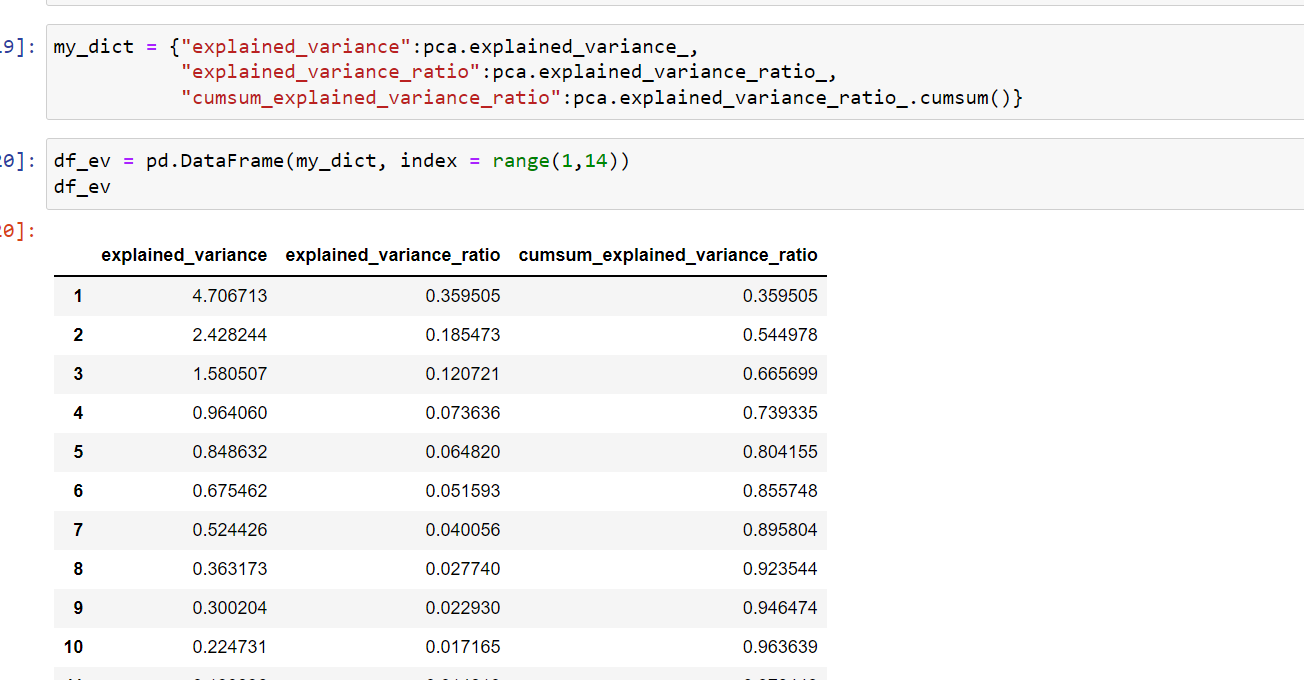

## eigenvectörler birbirine diktir korelasyon demek ikisinin çarpımı demek vektörlerin çarpımı demek olduğu için korelasyonlar cos 90 = 0 olduğu için korelasyonları 0